In [1]:
#importing dependecies and libraries 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Data Processing 

In [2]:
#Importing dataset

data = pd.read_csv("Resources/Hate_crime.csv")
data.head()

C:\Users\abebe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
#printing columns to see what we are working with
print(data.shape)
print(data.columns)


(219073, 28)
Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')


In [4]:
#dropping columns with null values over 90%
df = data.drop(columns = ["ORI", "STATE_ABBR","ADULT_OFFENDER_COUNT","JUVENILE_OFFENDER_COUNT", "PUB_AGENCY_UNIT", "JUVENILE_VICTIM_COUNT", "OFFENDER_ETHNICITY", "ORI"]) 
df.shape

(219073, 21)

In [5]:
# drop any rows with null values
cleandata = df.dropna(how='any')
cleandata.shape

(50891, 21)

In [6]:
#hecking is there any list of columns with null value
cleandata.columns[cleandata.isna().any()].tolist()

[]

In [7]:
cleandata.isnull().sum(axis = 0).head()

INCIDENT_ID         0
DATA_YEAR           0
PUB_AGENCY_NAME     0
AGENCY_TYPE_NAME    0
STATE_NAME          0
dtype: int64

In [8]:
#print all the columns 

cleandata.head(4)


#Rename Columns
usa_hatecrime_df = cleandata.rename(columns={"INCIDENT_ID": "ID",
                          "DATA_YEAR": "Year",
                         "PUB_AGENCY_NAME": "Agency_name",
                         "AGENCY_TYPE_NAME": "Agency_type",
                         "STATE_NAME": "State",
                         "DIVISION_NAME": "Devision",
                         "REGION_NAME": "Region",
                         "POPULATION_GROUP_CODE": "Population_code",
                         "POPULATION_GROUP_DESC": "Population_group",
                          "INCIDENT_DATE": "Incident_date",
                         "TOTAL_OFFENDER_COUNT": "offender_count",
                         "OFFENDER_RACE": "OffenderRace",
                         "VICTIM_COUNT": "Victim_count",
                        "OFFENSE_NAME": "Offense",
                          "TOTAL_INDIVIDUAL_VICTIMS": "Victim_no",
                          
                         "LOCATION_NAME": "Location",
                         "BIAS_DESC": "Bias",
                         "VICTIM_TYPES": "Victim_types",
                         "MULTIPLE_OFFENSE": "Multiple_Offense",
                         "MULTIPLE_BIAS": "Multiple_bias"})
usa_hatecrime_df.head(3)

,ID,Year,Agency_name,Agency_type,State,Devision,Region,Population_code,Population_group,Incident_date,...,offender_count,OffenderRace,Victim_count,Offense,Victim_no,Location,Bias,Victim_types,Multiple_Offense,Multiple_bias
60781,625581,1999,Westfield,City,Indiana,East North Central,Midwest,5,"Cities from 10,000 thru 24,999",22-Dec-99,...,1,Unknown,1,Intimidation,1.0,Residence/Home,"Anti-Multiple Religions, Group",Individual,S,S
100969,483731,2004,Rockford,City,Illinois,East North Central,Midwest,2,"Cities from 100,000 thru 249,999",22-Nov-04,...,2,Black or African American,1,Murder and Nonnegligent Manslaughter,1.0,Park/Playground,Anti-White,Individual,S,S
123890,438041,2007,University of Kentucky,University or College,Kentucky,East South Central,South,7,"Cities under 2,500",20-Feb-07,...,0,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,School/College,Anti-Heterosexual,Business,S,S


In [9]:
# number of years in the dataset 
print(usa_hatecrime_df.Year.nunique())

# 
usa_hatecrime_df.State.nunique()

15


52

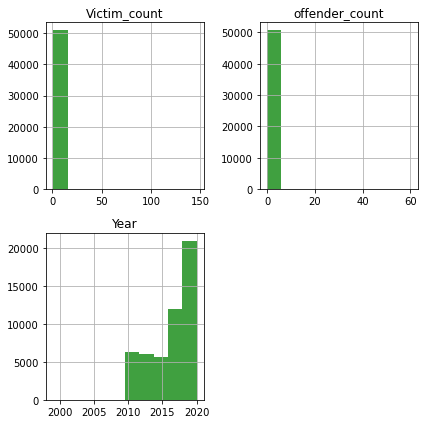

In [10]:
#Visual summary of our dataset numerical values
usa_hatecrime_df[['Victim_count', 'offender_count', 'Year', 'Population_group']].hist(figsize=(6, 6), bins=10, alpha = 0.75, color = 'green')
plt.tight_layout()
plt.show()

### Data Analysis on Hate Crime in USA

In [11]:
#Each Year which state has the highest count of victim numbers in USA
data= usa_hatecrime_df.groupby(['Year','State'])['Victim_count'].sum().reset_index().sort_values(by='Victim_count',ascending=False)
data.head(5).style.background_gradient(cmap='Blues')

,Year,State,Victim_count
367,2020,California,1377
11,2011,California,1253
168,2016,California,1190
218,2017,California,1137
265,2018,California,1128


In [12]:
#Total count of offenses commited  each state
df = usa_hatecrime_df[usa_hatecrime_df.Year > 2009].copy()
df = df[['Year','State','Offense']].copy()
grp = df.groupby(['Year', 'State']).count()
df2 = grp.reset_index().sort_values(['Year','Offense'],ascending=False)
df2.head()

,Year,State,Offense
363,2020,California,1141
390,2020,New Jersey,989
403,2020,Texas,550
407,2020,Washington,451
382,2020,Michigan,420


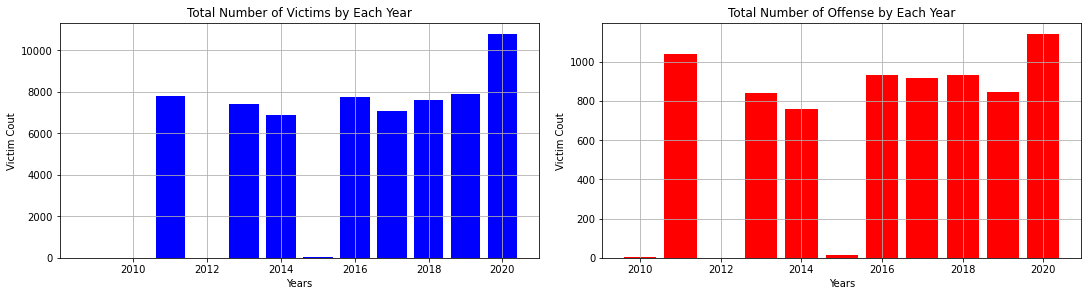

In [13]:
#Plotting number of vitcims and Offenses each year
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4), constrained_layout=True)

data_ten_years = usa_hatecrime_df.loc[usa_hatecrime_df['Year'] >= 2009]

df = data_ten_years.groupby(['Year']).sum().reset_index()
ax1.bar(df['Year'], df['Victim_count'], color="blue")
ax1.set_xlabel('Years')
ax1.set_ylabel('Victim Cout')
ax1.title.set_text( 'Total Number of Victims by Each Year')
ax1.grid()


df = data_ten_years.groupby(['Year']).sum().reset_index()
ax2.bar(df2['Year'], df2['Offense'], color="red")
ax2.set_xlabel('Years')
ax2.set_ylabel('Victim Cout')
ax2.title.set_text( 'Total Number of Offense by Each Year')
ax2.grid()



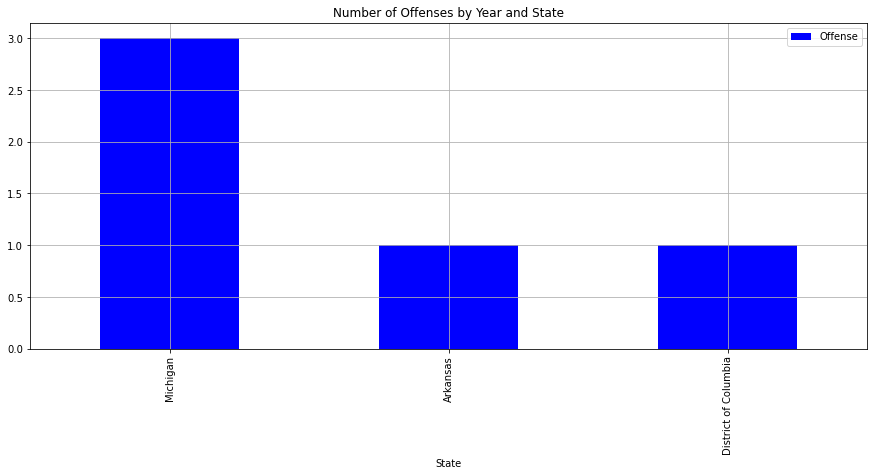

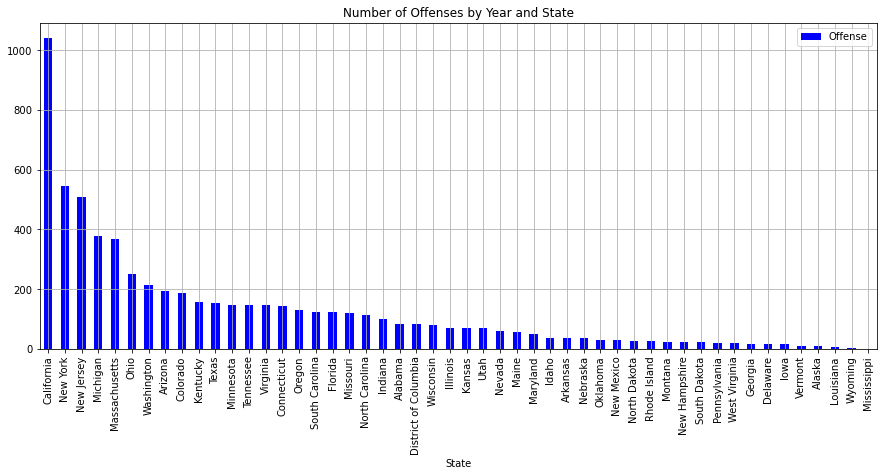

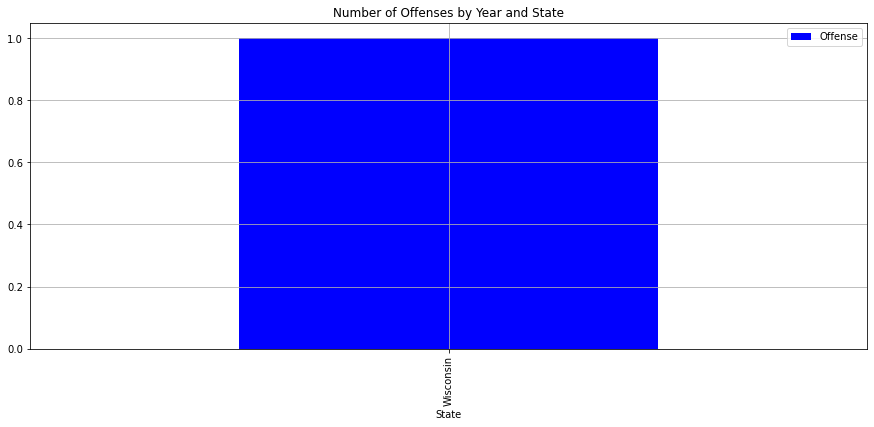

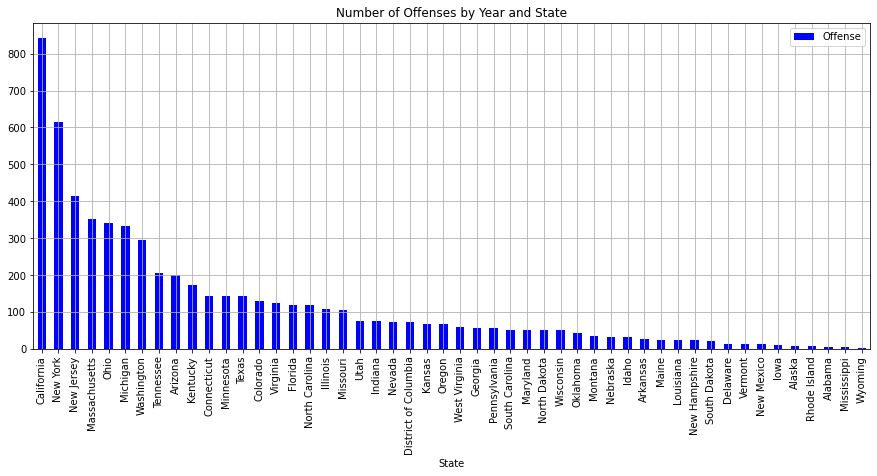

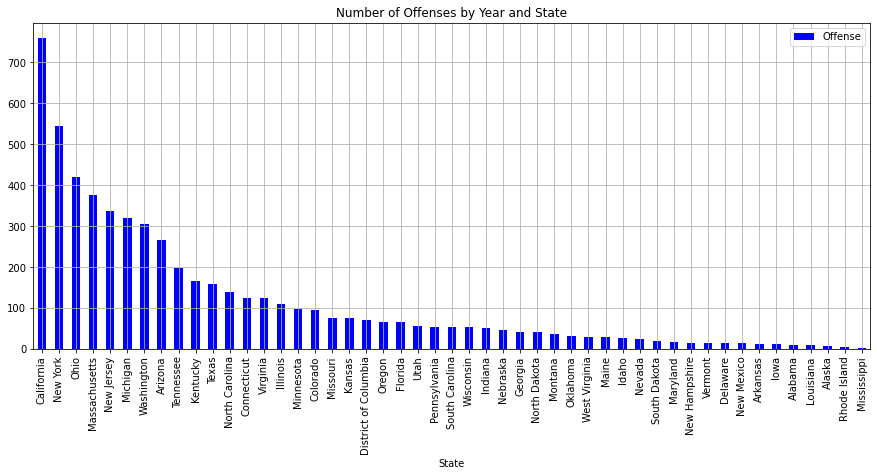

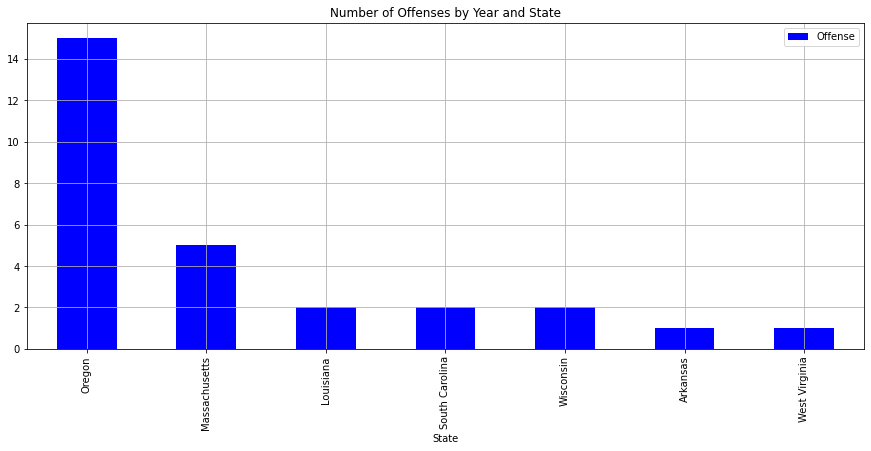

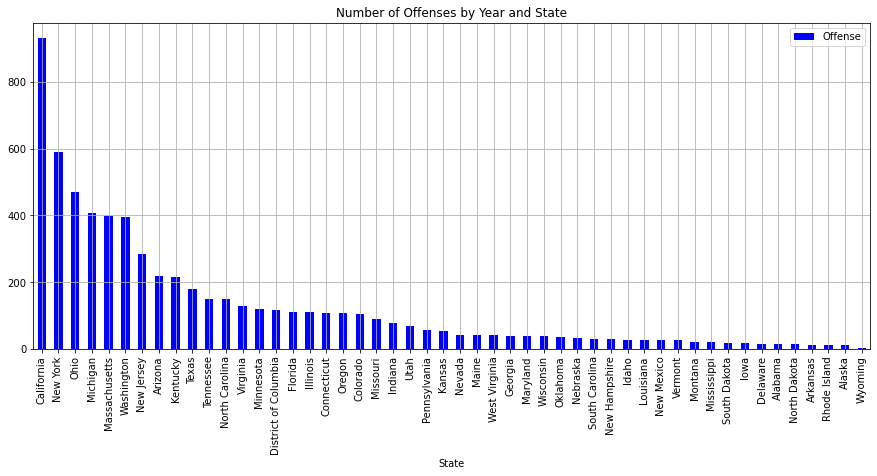

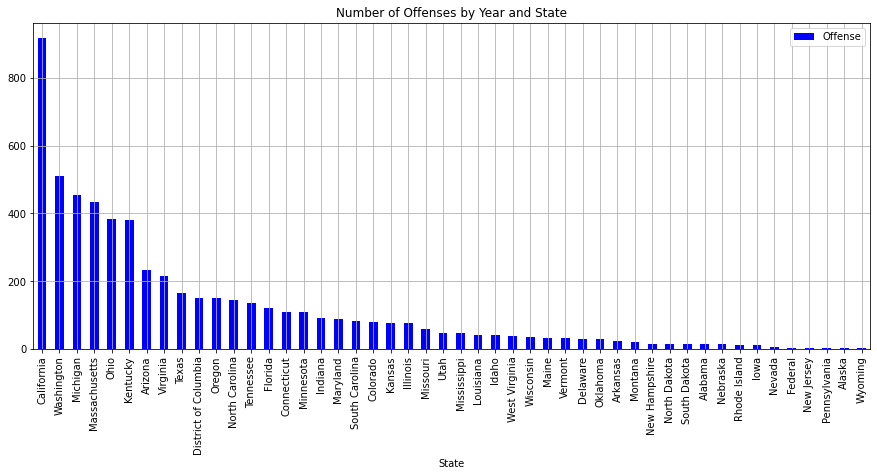

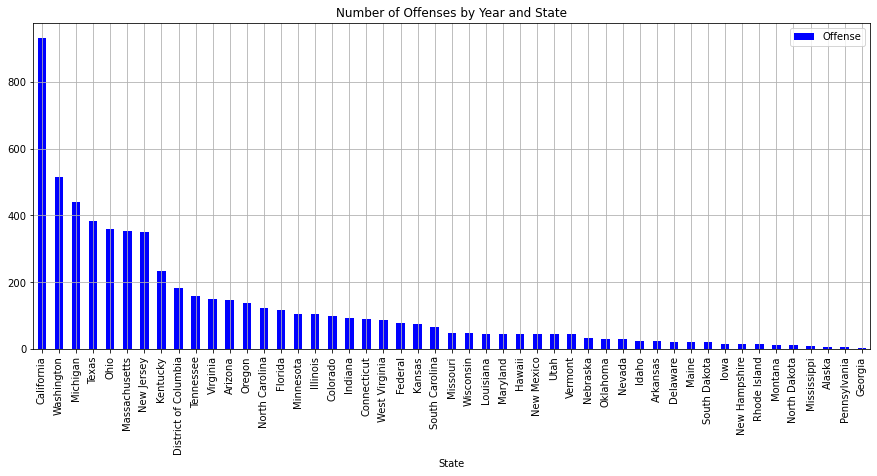

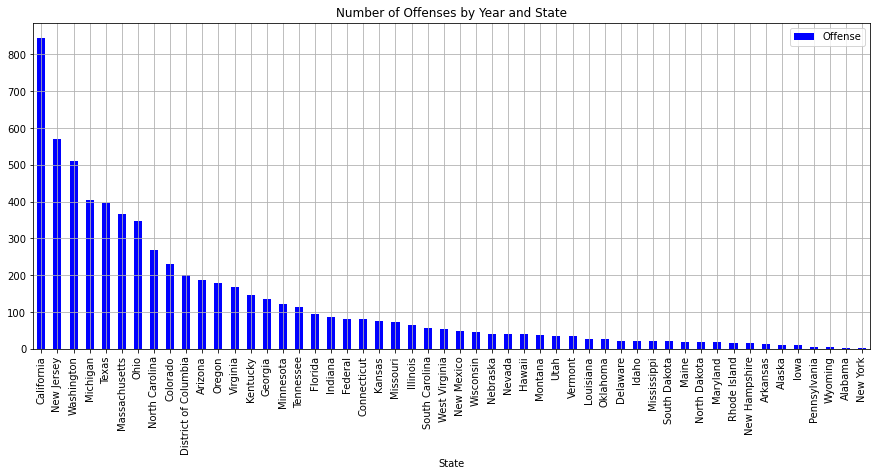

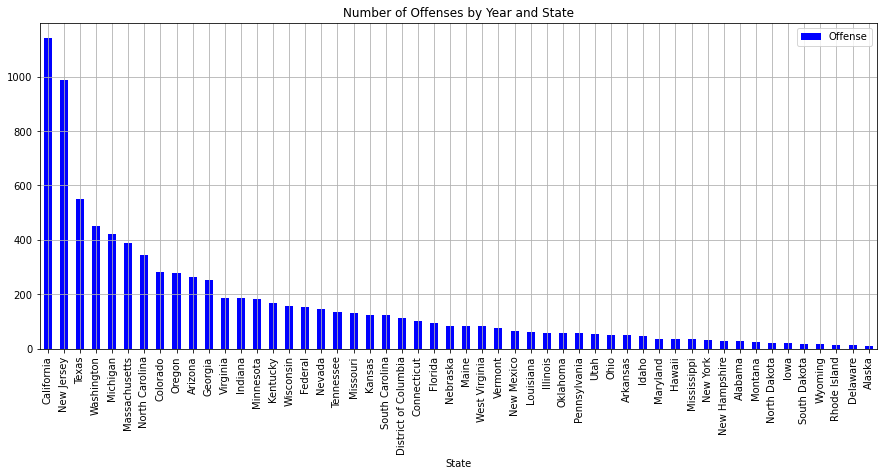

In [14]:
for i in range(2010,2021):
    df2[df2.Year == i].plot.bar('State','Offense',figsize=(15,6),grid=True, title='Number of Offenses by Year and State', color='blue')

In [15]:
#how many counts of hate crimes are there in 2019
Totalhatecrime = usa_hatecrime_df['ID'].count()
Totalhatecrime
Offenses_cnt = usa_hatecrime_df['Offense'].value_counts()
df = pd.DataFrame(Offenses_cnt)
df.head()

,Offense
Intimidation,13976
Destruction/Damage/Vandalism of Property,12388
Simple Assault,11144
Aggravated Assault,5538
All Other Larceny,922


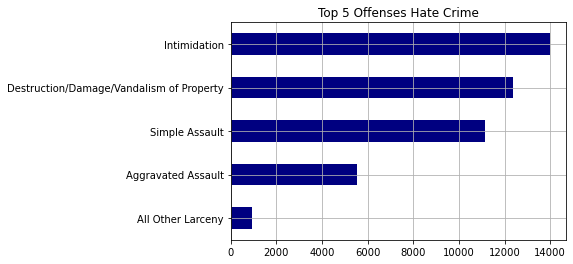

In [16]:
df4 = usa_hatecrime_df.Offense.value_counts().iloc[:5].sort_values()
df4.plot(kind='barh', color='navy', title = "Top 5 Offenses Hate Crime")
plt.grid()

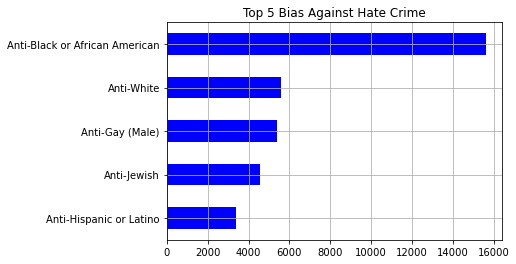

In [17]:
df5= usa_hatecrime_df.Bias.value_counts().iloc[:5].sort_values()
df5.plot(kind="barh", title = "Top 5 Bias Against Hate Crime", color="blue")
plt.grid()

In [18]:
#Correlation Analysis
corr_df = usa_hatecrime_df[["Year", "State", "Victim_no", "offender_count", "Victim_count", "offender_count"]]
corr_df.corr()

,Year,Victim_no,offender_count,Victim_count,offender_count
Year,1.000000,0.032896,-0.042319,0.006962,-0.042319
Victim_no,0.032896,1.000000,0.105120,0.933310,0.105120
offender_count,-0.042319,0.105120,1.000000,0.064311,1.000000
Victim_count,0.006962,0.933310,0.064311,1.000000,0.064311
offender_count,-0.042319,0.105120,1.000000,0.064311,1.000000


In [19]:

X_train,X_test,y_train,y_test=train_test_split(corr_df[['Victim_count']],corr_df.Year, test_size=.20)

line=LinearRegression().fit(X_train,y_train)
print(f'Slope: {line.coef_[0]}')
print(f'Intercept: {line.intercept_}')

Slope: 0.012185010878141072
Intercept: 2016.1818349811863


In [20]:
y_pred = line.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

3.0017394729214026

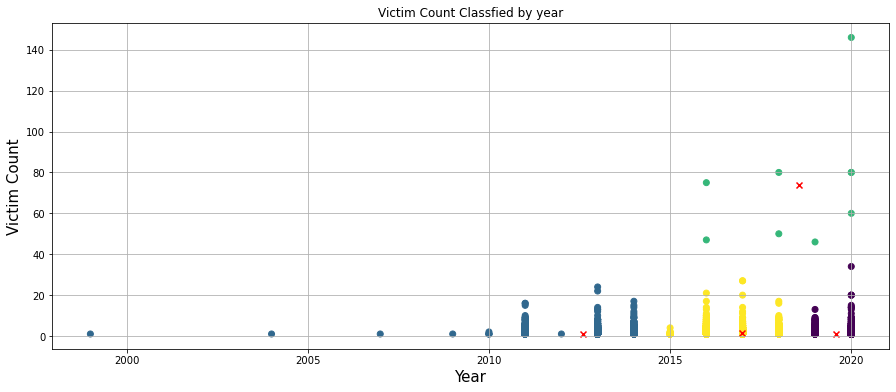

In [21]:
#Classify victim counts through the year. This will help us understand the time frame when most hate crimes happened 
df = usa_hatecrime_df[['Year', 'Victim_count']]

kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=[15,6])
plt.grid()
plt.title('Victim Count Classfied by year',fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Victim Count',fontsize=15)
plt.scatter(usa_hatecrime_df['Year'], usa_hatecrime_df['Victim_count'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', c='red')
plt.show()

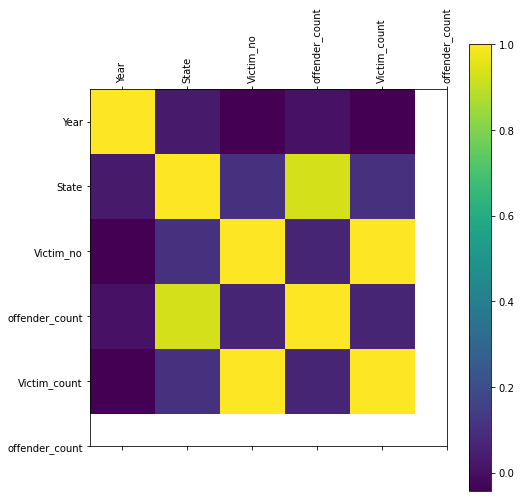

In [22]:
# set the size of the figure
plt.rcParams["figure.figsize"] = (8,8)

# use matplotlib.pyplot.matshow() to represent an correlation matrix in a new figure window
plt.matshow(corr_df.corr())

# set the ticks
plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)

# set the color bar
plt.colorbar()

# draw
plt.show()

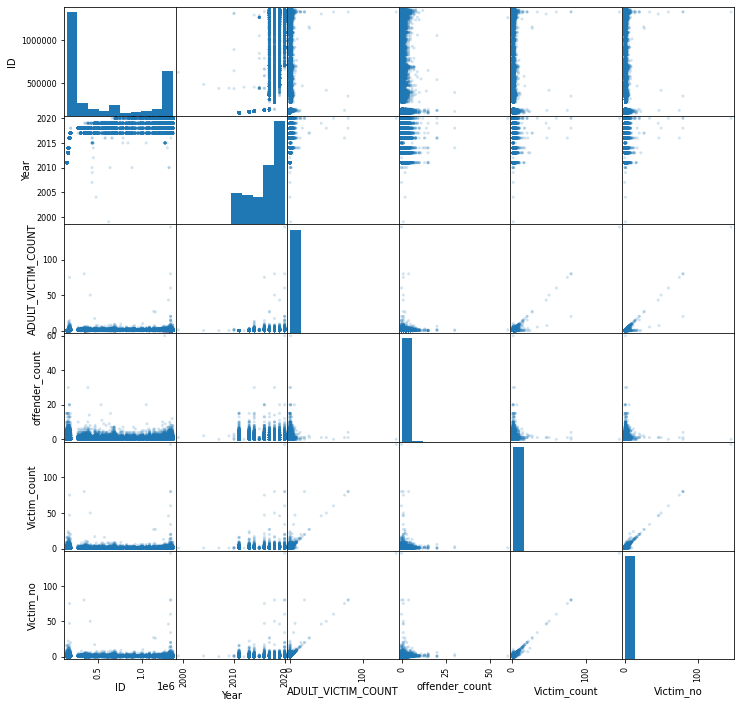

In [23]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(usa_hatecrime_df, alpha=0.2, figsize = (12, 12))